# Classifying Song Genres

In [1]:
# This is a code cell without any tag. You can put convenience code here,
# but it won't be included in any way in the final project.
# For example, to be able to run tests locally in the notebook
# you need to install the following:
# pip install nose
# pip install git+https://github.com/datacamp/ipython_nose
# and then load in the ipython_nose extension like this:
%load_ext ipython_nose

Welcome to the official authoring notebook for your DataCamp Project! This notebook, named `project.ipynb`, contains a variety of tagged cells. Tags are in the top left corner of cells. Here's an example of a tag:

![tagged_cell_img](https://i.imgur.com/H2TB22Y.png)

These tagged cells are processed by software written by our talented DataCamp engineers and a [DataCamp Project](https://www.datacamp.com/projects) is the product.

<img src="https://i.imgur.com/7mqMP5E.jpg" alt="DataCamp Project interface" width="600px"/>

Before you start working on this notebook, please read the `project.ipynb` notebook format in our [documentation](https://authoring.datacamp.com/projects/projects-format.html). Each type of tagged cell is described there.

When you first open this notebook, you will find a template for each of the tagged cells for all tasks in your Project. Please abide by the content rules in both the documentation and in each template cell to ensure students have a consistent and smooth learning experience.

If you can't find an answer in the documentation or in this template, please [create an Issue](https://help.github.com/articles/creating-an-issue/) in your Project's GitHub repository and your DataCamp contact will respond as soon as possible.

Happy creating!

*Again, this cell won't be included in the live version of the Project because it has no tag.*

## 1. Preparing our dataset

_These recommendations are so on point! How does this playlist know me so well?_

<img src="https://c1.staticflickr.com/1/449/18060892884_133c05a691_b.jpg" alt="Project Image Record" width="600px"/>

Over the past few years, streaming services with huge catalogues have become the primary means through which most people listen to their favourite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.

For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.

To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as `danceability` and `acousticness` on a scale from -1 to 1. These exist in two different files, which are in different formats - csv and json. While csv is a popular file format for denoting tabular data, json is another common file format in which databases often return the results of a given query.

Let's start by creating two pandas `DataFrames` out of these files that we can merge so we have labels and features for the classification later on.

Read in the data using `pandas` and merge the DataFrames into one usable dataset.

- Read in the .csv with the track metadata and name the DataFrame `tracks`.
- Read in the .json with the track acoustic metrics and name the DataFrame `track_metrics`.
- Merge the DataFrames on matching `track_id` values. Only retain the `track_id` and `genre_top` columns of `tracks`. 
- Inspect the DataFrame using the `.info()` method.

<hr>

## Good to know

This Project lets you apply what you learned in [Supervised learning with scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn) and learn some new skills as well, including data preprocessing, dimensionality reduction and machine learning using the `scikit-learn` package. We recommend you take those courses before starting this Project.

Helpful links:
- Documentation for pandas [`read_csv()`](), [`read_json()`]() and [`pd.merge()`]() functions
- Variance of the PCA features [exercise](https://campus.datacamp.com/courses/unsupervised-learning-in-python/decorrelating-your-data-and-dimension-reduction?ex=7)
- Train/test/split + Fit/Predict/Accuracy [exercise](https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=11)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
import pandas as pd

# Read in track metadata with genre labels
tracks = ...

# Read in track metrics with the features
track_metrics = ...

# Merge the relevant columns of tracks and track_metrics
echo_tracks = ...

# Inspect the resultant dataframe
...

In [2]:
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv('datasets/fma-rock-vs-hiphop.csv')

# Read in track metrics with the features
track_metrics = pd.read_json('datasets/echonest-clean.json', precise_float=True)

# Merge the relevant columns of tracks and track_metrics
echo_tracks = pd.merge(track_metrics, tracks[['genre_top', 'track_id']], on='track_id')

# Inspect the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
track_id            4802 non-null int64
valence             4802 non-null float64
genre_top           4802 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [3]:
# This needs to be included at the beginning of every @tests cell.
%nose

# One or more tests of the students code.
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_tracks_read():
    assert tracks.shape == (17734, 21), \
        'The csv file should be read in using the equivalent pandas method.'

def test_metrics_read():
    assert track_metrics.shape == (13129, 9), \
        'The json file should be read in using the equivalent pandas method.'
        
def test_merged_shape():
    assert echo_tracks.shape == (4802, 10), \
        'The two datasets should be merged on matching track_id values.'

In [ ]:
# testing how many tests actually passed or failed
# if failed - nose returns traceback of failed test
%nose

## 2. Exploring pairwise relationships between continuous variables

We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:
- To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).
- When our datasets are very large, using fewer features can drastically speed up our computation time.

To get a sense of whether there are any strongly correlated features in our data, we will use simple built-in functions in the `pandas` and `seaborn` packages. 

Explore correlations in our dataset using pandas `corr` function and seaborn `pairplot`.
- See if there are any strong correlations in the correlation table generated from `DataFrame.corr()`.
- Import the `seaborn` library as `sns`.
- Visualize the correlations using a pairwise scatter plot with `sns.pairplot()`.

<hr>

Helpful links:
- seaborn `pairplot` function [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Create a correlation matrix
corr_metrics = ...
print(corr_metrics)

# Turn on inline plotting
%matplotlib inline

# Import seaborn
...

# Create the pairwise scatter plot 
...

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.189599 -0.477273          0.110033   
danceability         -0.189599      1.000000  0.045345         -0.118033   
energy               -0.477273      0.045345  1.000000         -0.002412   
instrumentalness      0.110033     -0.118033 -0.002412          1.000000   
liveness              0.041319     -0.143339  0.045752         -0.058593   
speechiness           0.038785      0.171311 -0.008645         -0.216689   
tempo                -0.110701     -0.094352  0.227324          0.023003   
track_id             -0.279829      0.102056  0.121991         -0.283206   
valence              -0.085436      0.428515  0.219384         -0.145200   

                  liveness  speechiness     tempo  track_id   valence  
acousticness      0.041319     0.038785 -0.110701 -0.279829 -0.085436  
danceability     -0.143339     0.171311 -0.094352  0.102056  0.428515  
energy            0.045

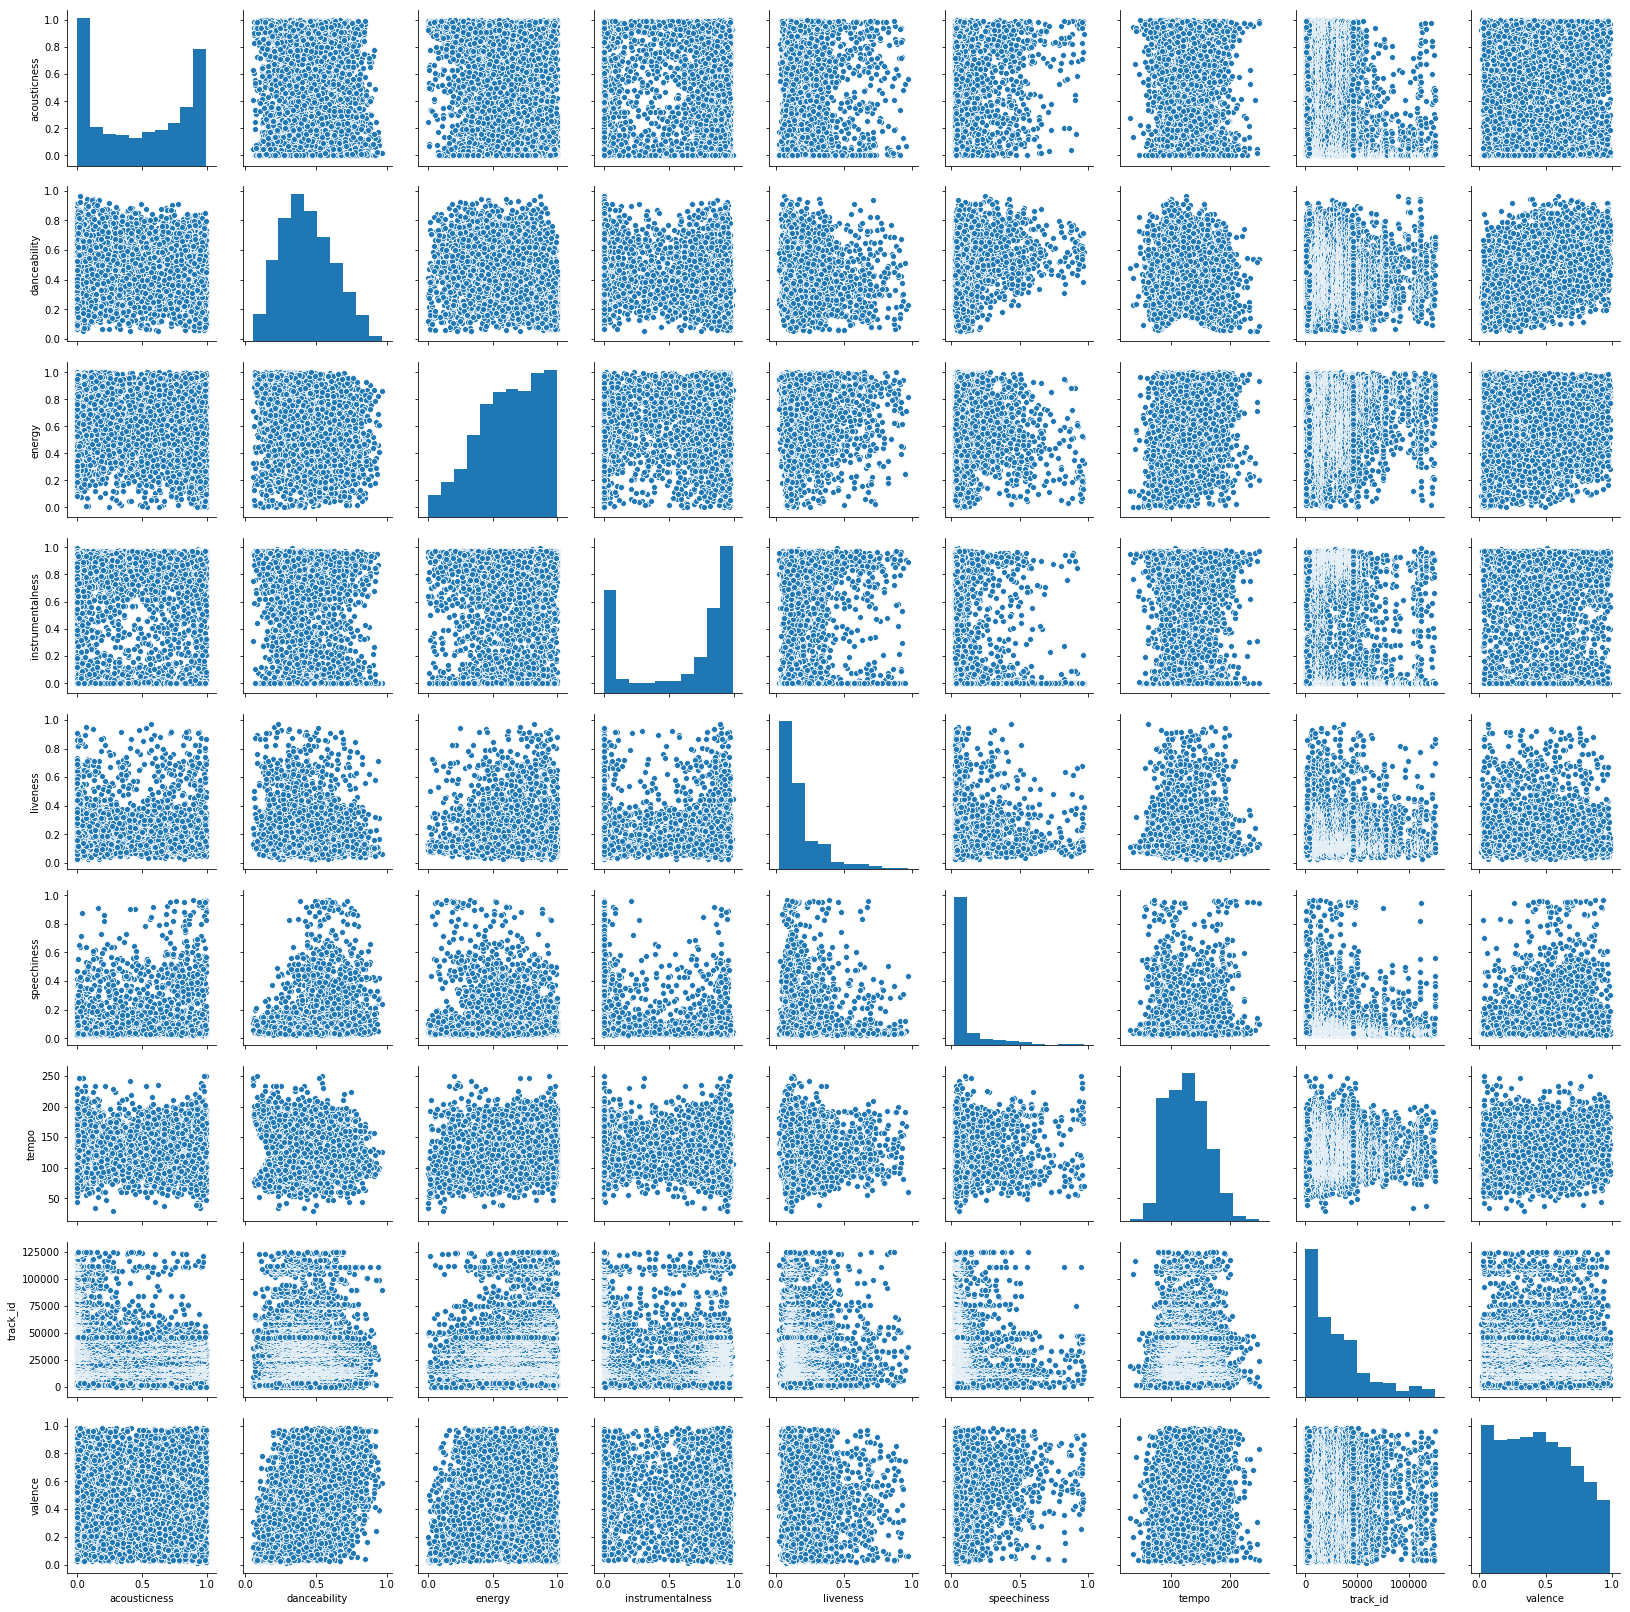

In [5]:
# Create a correlation matrix
corr_metrics = track_metrics.corr()
print(corr_metrics)

# Turn on inline plotting
%matplotlib inline

# Import seaborn
import seaborn as sns

# Create the pairwise scatter plot
STUDENT_PLOT_OBJECT = sns.pairplot(echo_tracks)

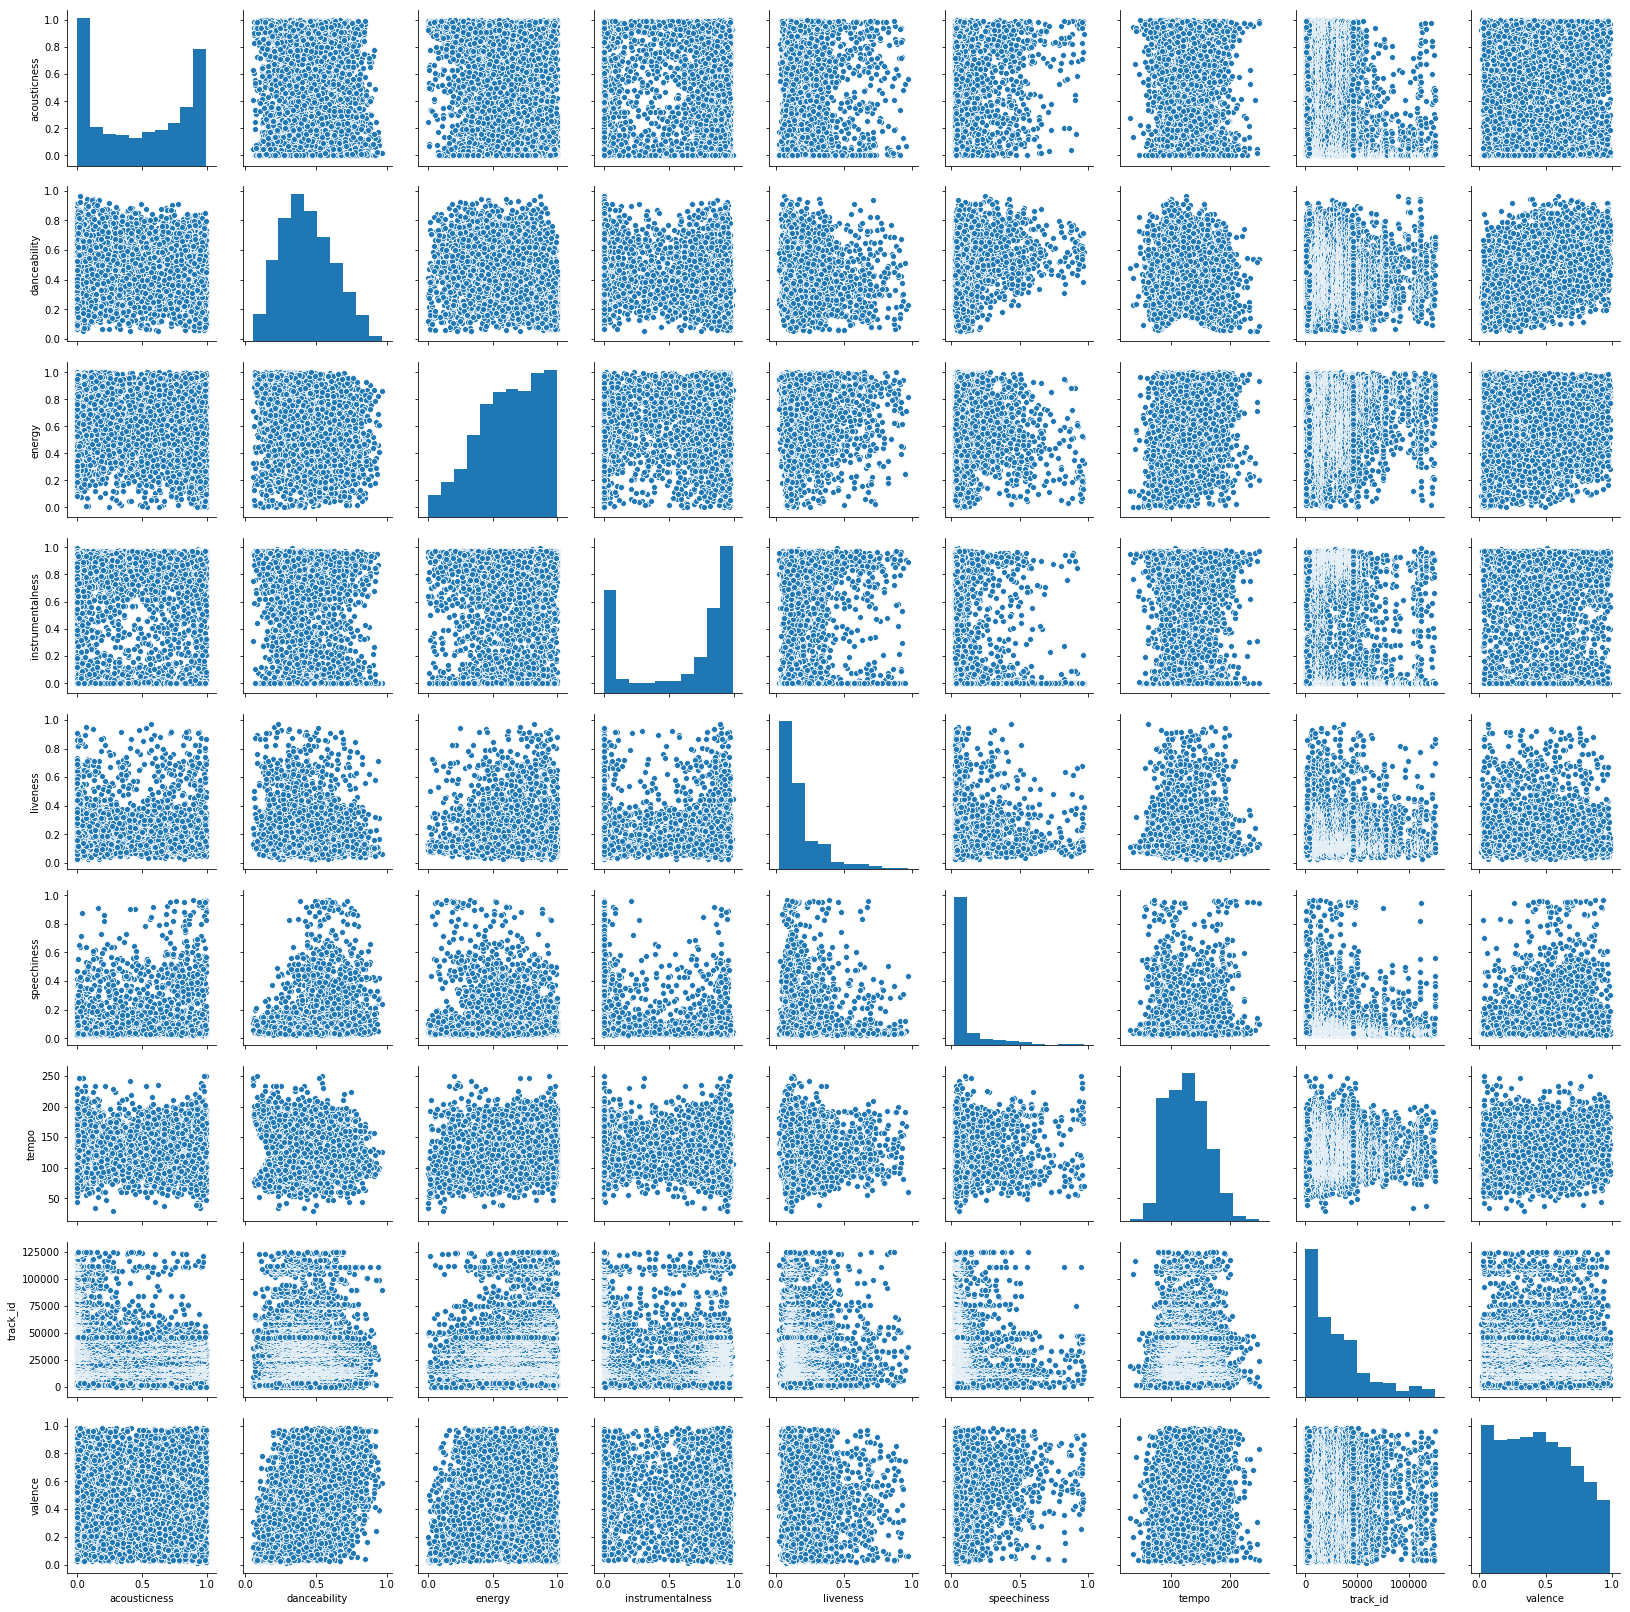

In [6]:
# This needs to be included at the beginning of every @tests cell.
%nose

import sys

p = sns.pairplot(echo_tracks)

def test_corr_matrix():
    assert all(corr_metrics == track_metrics.corr()), \
        'The correlation matrix can be computed using the .corr() method.'

def test_seaborn_import():
    assert 'seaborn' in sys.modules, \
        'Have you imported the seaborn package?'

def test_pairplot():
    # TODO - this function requires them to save their pairplot to an object...
    # otherwise there's no way to test for it
    # unless we parse their solution cell for the literal function call???
    # overall though - this pulls underlying matplotlib axes object and compares
    assert STUDENT_PLOT_OBJECT.diag_axes[0].axes.numCols == 9, \
        "Use seaborn's pairplot method on the same data frame that the correlation matrix was computed from"

In [7]:
%nose

6/6 tests passed


## 3. Normalizing the feature data

As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong correlations between our features, we can instead use a common approach to reduce the number of features called **principal component analysis (PCA)**. 

It is possible that the variance between genres can be explained by just a few features in the data set. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes. 

However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our data. There are a few methods to do this, but a common way is through *standardization*, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).

Prepare our dataset for training a model, and standardize the data.
- Define our features from `echo_tracks` by removing `genre_top` and `track_id` from the DataFrame using `DataFrame.drop()` along axis 1.
- Define our labels from `echo_tracks` which consist of only the `genre_top` column.

<hr>

Helpful links:
- pandas `DataFrame.drop()` method [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
- Square brackets in Pandas [exercise](https://campus.datacamp.com/courses/intermediate-python-for-data-science/dictionaries-pandas?ex=15)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Separate your features and labels 
features = ...
labels = ...

# Import the StandardScaler
...

# Scale the features and set the values to a new variable
scaler = ...
scaled_train_features = ...

In [16]:
# Define our features
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1) 

# Define our labels
labels = echo_tracks['genre_top']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)


In [39]:
# This needs to be included at the beginning of every @tests cell.
%nose

import sys

def test_dropped_columns():
    assert features.shape == (4802, 8), \
        'Use the .drop method to remove the genre_top and track_id columns'
        
def test_labels_df():
    assert labels.name == 'genre_top' and labels.shape == (4802, ), \
        'Does your labels DataFrame only contain the genre_top column?'
        
def test_standardscaler_import():
    assert 'sklearn.preprocessing' in list(sys.modules.keys()), \
        'The StandardScaler can be imported from sklearn.preprocessing'
        
def test_scaled_train_features():
    assert scaled_train_features.shape == (4802, 8) and round(scaled_train_features[0][0], 2) == -0.19, \
        "Use the StandardScaler's fit_transform method to scale your features"
    

## 4. Principal Component Analysis on our scaled data

Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use **scree-plots** and **cumulative explained ratio plots** to find the number of components to use in further analyses.

Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

Use PCA to determine the explained variance of our features
- Import the `matplotlib.pyplot` module as `plt`, and our `PCA` function from `sklearn.decomposition`
- Create our PCA class using `PCA()`, fit the model on our `scaled_train_features` using PCA.fit(), and retrieve the explained variance ratio
- Make a bar plot of the explained variance ratio of each feature

<hr>

We run PCA on all our features at first, which is done by default if `n_components` is not specified.

Helpful links:
- sklearn PCA [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- matplotlib `bar` plot [documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [41]:
# Import our plotting module, and PCA function
#... YOUR CODE ...

# Get our explained variance ratios from PCA using all features
pca = ...
...
exp_variance = ...

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(...)

NameError: name 'plt' is not defined

<Container object of 8 artists>

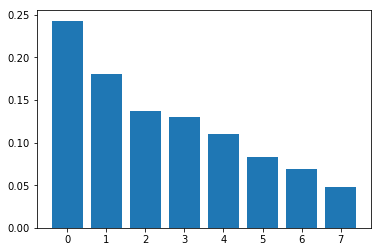

In [42]:
# Import our plotting module, and PCA function
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)

In [102]:
# This needs to be included at the beginning of every @tests cell.
%nose

import sklearn
import numpy as np

def test_pca_import():
    # TODO - do we need this?
    assert 'sklearn.decomposition.pca' in list(sys.modules.keys()), \
        'Have you imported the PCA object from sklearn.decomposition?'

def test_pca_obj():
    # TODO - do we also need this?
    assert type(pca) == sklearn.decomposition.pca.PCA, \
        "Use scikit-learn's PCA() object to create your own here"
        
def test_exp_variance():
    rounded_array = np.array([0.24, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.05])
    rounder = lambda t: round(t, ndigits = 2)
    vectorized_round = np.vectorize(rounder)
    assert all(vectorized_round(exp_variance) == rounded_array), \
        'Following the PCA fit, the explained variance ratios can be obtained via the explained_variance_ratio_ method'
        
def test_scree_plot():
    expected_xticks = [float(n) for n in list(range(-1, 9))]
    assert list(ax.get_xticks()) == expected_xticks, \
        'Plot the number of pca components (on the x-axis) against the explained variance (on the y-axis)'

## 5. Further visualization of PCA

Unfortunately, there does not appear to be a clear elbow in this scree plot, which means it is not straightforward to find the number of intrinsic dimensions using this method. 

But all is not lost! Instead, we can also look at the **cumulative explained variance plot** to determine how many features are required to explain, say, about 90% of the variance (cutoffs are somewhat arbitrary here, and usually decided upon by 'rules of thumb'). Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.

Plot the cumulative explained variance of our PCA.
- Import the `numpy` library as `np`.
- Calculate the cumulative sums of our explained variance using `np.cumsum()`.
- Plot the cumulative explained variances using `ax.plot` and look for the number of components at which we can account for >90% of our variance; assign this to `n_components`.
- Perform PCA using `n_components` and project our data onto these components.

<hr>

Helpful links:
- numpy `cumsum()` function [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
- sklearn PCA [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Import numpy
...

# Calculate the cumulative explained variance
cum_exp_variance = ...

# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
...
ax.axhline(y=0.9, linestyle='--')
n_components = ...

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components)
pca.fit(scaled_train_features)
projection = ...

In [ ]:
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components)
pca.fit(scaled_train_features)
projection = pca.transform(scaled_train_features)

In [ ]:
# This needs to be included at the beginning of every @tests cell.
%%nose

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 6. Train a decision tree to classify genre

Now that we have reduced the dimensionality of our dataset, we can start classifying our data. In order to do that, we first need to split our dataset into 'train' and 'test' subsets, where the 'train' subset will be used to train our model while the 'test' dataset allows for model performance validation.

Here, we will be using a simple algorithm known as a decision tree. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.

Here is an example of a decision tree that demonstrates the process by which an input image (in this case, of a shape) might be classified based on the number of sides it has and whether it is rotated.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Simple_decision_tree.svg/2000px-Simple_decision_tree.svg.png" alt="Decision Tree Flow Chart Example" width="350px"/>


Prepare our training and test sets and train our first classifier.
- Import the `train_test_split` function from `sklearn.model_selection` library
- Split our projected data into train and test, features and labels, respectively using `train_test_split()`.
- Create our decision tree classifier using DecisionTreeClassifier() and a random state of `10` and train the model using the `model.fit()` notation
- Find the predicted labels from our trained model using the `model.predict()` notation.

<hr>

Helpful links:
- scikit-learn `train_test_split()` function [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- scikit-learn `DecisionTreeClassifier()` class [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Import train_test_split function and Decision tree classifier
# ... YOUR CODE ...

# Split our data
train_features, test_features, train_labels, test_labels = ...

# Train our decision tree
tree = ...
...

# Predict the labels for the test data
pred_labels_tree = ...

In [ ]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(
    projection, labels, random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

In [ ]:
# This needs to be included at the beginning of every @tests cell.
%%nose

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 7. Compare our decision tree to a logistic regression

Although our tree's performance is decent, it's a bad idea to immediately assume that it's therefore the perfect tool for this job -- there's always the possibility of other models that will perform even better! It's always a worthwhile idea to at least test a few other algorithms and find the one that's best for our data.

Sometimes simplest is best, and so we will start by applying **logistic regression**. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have both models, we can compare them on a few performance metrics, such as false positive and false negative rate (or how many points are inaccurately classified). 

Train our logistic regression and compare the performance with our decision tree
- Create our logistic regression model using LogisticRegression() and a random state of `10`.
- Train the model using the `model.fit()` notation and assign the predicted labels for the `test_features` to `pred_labels_logit`.
- Print the classification report for our trained Decision Tree and Logistic Regression models. 

<hr>

Helpful links:
- pandas `read_csv()` function [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- Reading a flat file [exercise](https://campus.datacamp.com/courses/pandas-foundations/data-ingestion-inspection?ex=10) in the pandas Foundations course

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logisitic regression and predict labels for the test set
logreg = ...
pred_labels_logit = ...

# Compare the models using classification_report
from sklearn.metrics import classification_report

# Create the classification report for the tree based model
class_rep_tree = ...

# Create the classification report for the logistic regression model
class_rep_log = ...

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logisitic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Compare the models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

In [ ]:
# This needs to be included at the beginning of every @tests cell.
%%nose

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 8. Balance our data for greater performance

Both our models do similarly well, boasting 87% precision each. However, looking at our classification report, we can see that rock songs are fairly well classified, but hip hop songs are disproportionately misclassified as rock songs. 

Why might this be the case? Well, just by looking at the number of data points we have for each class, we see that we have far more data points for the rock classification than for hip hop, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just rock songs, which is less than ideal.

To account for this, we can weight the value of a correct classification in each class inversely to the occurrence of data points for each class. Since a correct classification for "Rock" is not more important than a correct classification for "Hip-Hop" (and vice versa), we only need to account for differences in _sample size_ of our data points when weighting our classes here, and not relative importance of each class. 

Balance our dataset such that the number of tracks for each genre are the same.
- Subset only the hip-hop tracks from `echo_tracks` using df.loc[], and the same for the rock tracks
- Sample `rock_only` such that there are the same number of data points as there are hip-hop data points

<hr>

Helpful links:
- pandas `DataFrame.loc[]` slicing [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)
- pandas `merge()` function [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge.html#pandas.merge)
- pandas `DataFrame.sample()` method [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = ...
rock_only = ...

# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = ...

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = ...

# Redefine our train, test sets
features, labels = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1), rock_hop_bal['genre_top']
train_features, test_features, train_labels, test_labels = train_test_split(...)

In [ ]:
# Subset a balanced proportion of data points
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']

# subset only the rock songs, and take a sample the same size as there are hip-hop songs
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock'].sample(hop_only.shape[0])

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# Redefine our train, test sets
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

In [ ]:
# This needs to be included at the beginning of every @tests cell.
%%nose

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 9. Confirm whether balancing our dataset improves our model bias

We've now balanced our dataset, but in doing so, we've removed a lot of data points that might have been crucial to training our models. Let's test to see if balancing our data improves model bias towards the "Rock" classification while retaining overall classification performance. 

Note that we have already reduced the size of our dataset and will go forward without applying any dimensionality reduction. In practice, we would consider dimensionality reduction more rigorously when dealing with vastly large datasets and when computation times become prohibitively large.

Compare the two model performances on the balanced data.
- Create and train your decision tree using `DecisionTreeClassifier()` and a random state of `10`, then predict on the `test_features`.
- Create and train your logistic regression using `LogisticRegression()` and a random state of `10`, then predict on the `test_features`.
- Compare the performance of the two models using `classification_report()`. 

<hr>


Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
# Train our decision tree on the balanced data
tree = ...
...
pred_labels_tree = ...

# Train our logistic regression on the balanced data
logreg = ...
...
pred_labels_logit = ...

# compare the models
print("Decision Tree: \n", classification_report(...))
print("Logistic Regression: \n", classification_report(...))

In [ ]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

In [ ]:
# This needs to be included at the beginning of every @tests cell.
%%nose

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

## 10. Using cross-validation to evaluate our models

Success! Balancing our data has removed bias towards the more prevalent class. To get a good sense of how well our models are actually performing, we can apply what's called **cross-validation** (CV). This step allows us to compare models in a more rigorous fashion.

Since the way our data is split into train and test sets can impact model performance, CV attempts to split the data multiple ways and test the model on each of the splits. Although there are many different CV methods, all with their own advantages and disadvantages, we will use what's known as **K-fold** CV here. K-fold first splits the data in K different, equally sized subsets. Then, it iteratively uses each subset as a test set while using the remainder of the data as train sets. Finally, we can then aggregate the results from each fold for a final model performance score.

Use cross-validation to get a better sense of your model performance.
- Create your cv using `KFold()` with `10` folds and a random state of `7`.
- Train each of your models using `cross_val_score()`.
- Print the mean of the cross validation scores for each model using `np.mean()`.

<hr>

Helpful links:
- `KFold()` [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
- `cross_val_score()` [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

Hints are meant for students who are stuck. Since students can't view solutions in Projects, clicking the hint button is their last resort. We often recommend including code scaffolding (example below).

You can read `path_to/my_data.csv` into a DataFrame named `my_data` like this after importing the pandas library:

```python
import pandas as pd
my_data = pd.read_csv("path_to/my_data.csv")
```

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
...


tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = ...
logit_score = ...

# print the mean of each array of scores
print("Decision Tree:", ..., "Logistic Regression:", ...)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Set up our K-fold cross-validation
kf = KFold(10, random_state=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)

# Train our models using KFold cv
tree_score = cross_val_score(tree, features, labels, cv=kf)
logit_score = cross_val_score(logreg, features, labels, cv=kf)

print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

In [ ]:
# This needs to be included at the beginning of every @tests cell.
%%nose

# One or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert like_this == 'missing part filled in', \
    'The student will see this message if the test fails'

*The recommended number of tasks in a DataCamp Project is between 8 and 10, so feel free to add more if necessary. You can't have more than 12 tasks.*